# Multiple Regression

- Do age and IQ scores effectively predict GPA?
- Do weight, height, and age explain the variance in cholesterol levels?

## Learning goals:

For a multivariable linear regression, students will be able to:

* compare and contrast with univariable linear regression
* write an example of the equation
* develop one with statsmodels 
* assess the model fit 
* interpret coefficients
* validate the model
* export the model

### Keyterms
- Multivariable
- Train-test split
- MSE: Mean squared error
- RSME: Root squared mean error

## Scenario

The University of San Paulo in Brazil is likes to party. We are a contracted beer supplier to the University and we want to make sure we have enough supply on hand. We are hoping to build a model that can predict beer consumption given other variables. 


![beer](pexels-photo-544988-small.jpeg)
More about the dataset can be found [here](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)

###  Prior Knowledge


Before looking at the dataset, what variables do we think might be in there? What might make a student drink more? 

#### Step 1:  Discussion 

- compare and contrast with univariable linear regression
- How is this different from the regression we've done before?
- Here, you'll explore how to perform linear regressions using multiple independent variables to better predict a target variable.

#### Step 2:  Develop a multivariable regression model with statsmodels 

**Load Libraries and load in data**

In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

In [4]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


### Small Data Cleaning Tasks:
- Drop Date
- convert all the columns to numeric (replace ',' with '.')
- rename columns to be `name = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']`

In [5]:
df.drop(columns='Data', inplace=True)

In [17]:
f = lambda x: x.replace(',','.') if type(x) == str else x
df = df.applymap(f)
df = df.applymap(lambda x: float(x) if type(x) == str else x)

In [23]:
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'].map(lambda x: x*1000)

In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(6)
memory usage: 20.0 KB


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


**Check** for NaNs

In [19]:
df.isna().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [20]:
df.dropna(inplace=True)

In [25]:
df.shape

(365, 6)

In [75]:
col_dict = dict(zip(df.columns, ['tempmedian', 'tempmin', 'tempmax', 'rain', 'finalsweek', 'target']))
df.rename(columns = col_dict, inplace=True)
df

,tempmedian,tempmin,tempmax,rain,finalsweek
0,27.30,23.9,32.5,0.0,0.0
1,27.02,24.5,33.5,0.0,0.0
2,24.82,22.4,29.9,0.0,1.0
3,23.98,21.5,28.6,1.2,1.0
4,23.82,21.0,28.3,0.0,0.0
5,23.78,20.1,30.5,12.2,0.0
6,24.00,19.5,33.7,0.0,0.0
7,24.90,19.5,32.8,48.6,0.0
8,28.20,21.9,34.0,4.4,0.0
9,26.76,22.1,34.2,0.0,1.0


### Everyone write an example of an equation for our multiple regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

<img src="https://miro.medium.com/max/1400/1*d0icRnPHWjHSNXxuoYT5Vg.png" width=450 />

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

What would the formula be with real values?

**Send your equations to me via zoom or slack and I will paste them into the notebook**

Equations here

>

![statsmodels](https://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

Okay, now here's how you can use format and join to make the formula with **code**:

In [78]:
formula = 'target~{}'.format("+".join(df.columns[:-1]))
# specifies the dependent variable by column name, all other columns defined as dependent variables by +
formula

'target~tempmedian+tempmin+tempmax+rain'

In [79]:
model = sm.OLS(df.target, df.drop('target', axis=1)).fit() # uses all other columns as dependent variables

AttributeError: 'DataFrame' object has no attribute 'target'

In [34]:
model.summary()
# statsmodel.api does not by default return a linear intercept! you can provide a user defined constant 
# or use the statsmodel.formula
# statsmodel is based on R method of no intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7620.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:26:01   Log-Likelihood:                -3372.8
No. Observations:                 365   AIC:                             6756.
Df Residuals:                     360   BIC:                             6775.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp-median   119.2008    201.992      0.590      0.555    -278.031     516.432
temp-min      114.5889    117.290      0.977      0.329    -116.071     345.249
temp-max      731.2896    101.871      7.179      0.000     530.952     931.627
rain          -55.2008     10.799     -5.112      0.000     -76.438     -33.963
finals-week  5481.5564    288.675     18.989      0.000    4913.855    6049.258
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
formula2 = 'target~{}'.format("+".join(df.columns[2:-1]))
formula2

'target~tempmax+rain+finalsweek'

In [56]:
df.columns

Index(['tempmedian', 'tempmin', 'tempmax', 'rain', 'finalsweek', 'target'], dtype='object')

In [64]:
model2 = smf.ols(formula=formula2, data=df)
model2.fit().summary()
# sm does not use an intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Tue, 27 Aug 2019   Prob (F-statistic):          3.85e-100
Time:                        13:48:45   Log-Likelihood:                -3345.4
No. Observations:                 365   AIC:                             6699.
Df Residuals:                     361   BIC:                             6714.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6432.0852    773.978      8.310      0.000    4910.014    7954.157
tempmax      668.5427     28.301     23.622      0.000     612.886     724.199
rain         -57.4891      9.832     -5.847      0.000     -76.824     -38.154
finalsweek  5184.0827    269.998     19.200      0.000    4653.117    5715.048
==============================================================================
Omnibus:                       38.795   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.850
Skew:                           0.153   Prob(JB):                      0.00162
Kurtosis:                       2.133   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the actual multivariable  linear regression equation with the coefficients?

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

#### Step 3: Assess the model fit
Demonstrate and Apply:

**Discussion:**

In groups of 2 or 3 write a synopsis of the following summary

* What can you say about the coefficients?

* What do the p-values tell us?

* What does R^2 represent

* What other insights do you notice?





#### Step 4: Validate the model 
![scikit](https://cdn-images-1.medium.com/max/1200/1*-FHtcdQljtGKQGm77uDIyQ.png)
- Build LinReg Model with Scikit-Learn
- Check some of the linear regression assumptions


[Documentation for sklearn `LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### Train test split
[sklearn function documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### So far we've used the whole dataset to build a model
![img1](whole_data.png)

#### But no promise how it will perform on new data

![img2](new_data.png)

#### So we split to help evaluate
![img3](tt_split.png)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

linreg = LinearRegression()
linreg.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [93]:
X = df.drop("target", axis=1)
y = df.target

KeyError: "['target'] not found in axis"

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [100]:
# use fit to form model
print(linreg.fit(X_train, y_train).coef_)
# remember these coefficients are in units of the columns

[ 259.22144051 -135.39791533  565.29375014  -44.42200099 5418.87840906]


In [101]:
linreg.coef_

array([ 259.22144051, -135.39791533,  565.29375014,  -44.42200099,
       5418.87840906])

In [102]:
linreg.intercept_

5977.396945394648

In [103]:
print(linreg.fit(X_train,y_train).intercept_)

5977.396945394648


In [ ]:
# Does not return the p-values for the sklearn
# t score and p values to relate to the output from statsmodel...

### Model evaluation

So far this looks very similar to `Statsmodels`.
Can you use the `LinearRegression` documentation to find:
- model coefficients?
- coefficients p-values?

In [104]:
# gives you r squared of the model
linreg.score(X_test, y_test)

0.6004383723169642

In [105]:
linreg.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

`score` here returns the R^2. 

How does it differ from when you use the whole dataset?

#### Saving model

![pickle](https://lovelygreens.com/wp-content/uploads/grandmas-dill-pickles-750x440.jpg)

```
model = LinearRegression()
model.fit(X_train, y_train)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
```


then to reload later:

```
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
```



In [ ]:
# linreg = LinearRegression()
# dump the linreg object
# import pickle
# with open('model.pkl','wb') as f:
#     pickle.dump(linreg, f)

### Integration:

Repeat this process for concrete mixture. 
What combination of materials creates the strongest concrete compressive strength?

The documentation can be found [here](http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
![test](building-construction-building-site-constructing-small.jpg)

In [142]:
df2 = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [132]:
df2.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [143]:
col_dict = dict(zip(df2.columns,['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAgg','FineAgg','Age','ConcreteStrength']))
df2.rename(columns = col_dict, inplace=True)

In [135]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
BlastFurnaceSlag    1030 non-null float64
FlyAsh              1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CoarseAgg           1030 non-null float64
FineAgg             1030 non-null float64
Age                 1030 non-null int64
ConcreteStrength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


In [136]:
df2.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAgg', 'FineAgg', 'Age', 'ConcreteStrength'],
      dtype='object')

In [138]:
f = 'ConcreteStrength~{}'.format("+".join(df2.columns[:-1]))
modelconc = smf.ols(formula=f, data=df2)
modelconc.fit().summary()
# sm does not use an intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ConcreteStrength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 27 Aug 2019   Prob (F-statistic):          6.76e-206
Time:                        14:21:43   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.1638     26.588     -0.871      0.384     -75.338      29.010
Cement               0.1198      0.008     14.110      0.000       0.103       0.136
BlastFurnaceSlag     0.1038      0.010     10.245      0.000       0.084       0.124
FlyAsh               0.0879      0.013      6.988      0.000       0.063       0.113
Water               -0.1503      0.040     -3.741      0.000      -0.229      -0.071
Superplasticizer     0.2907      0.093      3.110      0.002       0.107       0.474
CoarseAgg            0.0180      0.009      1.919      0.055      -0.000       0.036
FineAgg              0.0202      0.011      1.883      0.060      -0.001       0.041
Age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
import seaborn as sns

nan


C:\Users\Michelle\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michelle\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: If using all scalar values, you must pass an index

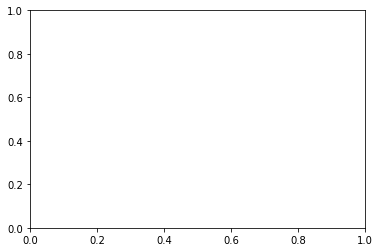

In [196]:
linreg = LinearRegression()
y = df2['ConcreteStrength']
X = df2.drop(columns=['ConcreteStrength','CoarseAgg','FineAgg'])

fig = plt.subplot(1,1,1)
for loop in range(5):
    scores = 
    for i in range(loop):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        linreg.fit(X_train, y_train)
        scores.append(linreg.score(X_test, y_test)) 
    print(np.mean(scores))
    sns.scatterplot(loop,np.mean(scores))
plt.show()

[ 0.10881922  0.08960089  0.07430507 -0.20494004  0.23199686  0.10995399]
25.178468665800295
0.5978897011031864


In [153]:
import pickle
with open('mjk_cement_model.pkl','wb') as f:
    pickle.dump(linreg, f)

### Assessment

### Reflection

### Resources

Resources
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

Full code implementation of Linear Regression
Full code — https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation

Multiple regression explained
https://www.statisticssolutions.com/what-is-multiple-linear-regression/
